***

# ANÁLISE DE DADOS DA EDUCAÇÃO - ENEM

***

## IMPORTAÇÃO LIBS

In [1]:
import pandas               as pd
import seaborn              as sns
import matplotlib.pyplot    as plt
import numpy                as np

## IMPORTAÇÃO DATASET

In [2]:
df_raw = pd.read_csv('MICRODADOS_ENEM_2019.csv', encoding = "ISO-8859-1", sep = ';')

In [3]:
# Visualizando os estados
df_raw['SG_UF_RESIDENCIA'].unique()

array(['PA', 'TO', 'MA', 'MG', 'CE', 'AM', 'GO', 'RO', 'DF', 'SC', 'PR',
       'AP', 'PI', 'RJ', 'ES', 'RR', 'SP', 'RS', 'MT', 'AC', 'MS', 'BA',
       'PB', 'PE', 'RN', 'SE', 'AL'], dtype=object)

In [4]:
# Criando a variável df para dados somente de SP
df = df_raw[(df_raw['SG_UF_RESIDENCIA'] == 'SP')]

In [6]:
# Visualizando o dataframe com dados aleatórios
df.sample(3)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
4994388,190005999299,2019,3550308,São Paulo,35,SP,20,M,1,3,...,B,A,B,B,B,A,B,A,B,B
3739452,190004744149,2019,3550308,São Paulo,35,SP,17,F,1,0,...,B,A,A,C,B,A,E,A,A,B
3693598,190004698294,2019,3509502,Campinas,35,SP,17,F,1,3,...,B,A,B,B,B,A,D,B,B,B


## EXPLORAÇÃO DO DATASET

In [7]:
# Tamanho do dataset
df.shape

print('O dataset possui {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O dataset possui 813772 linhas e 136 colunas


In [8]:
# Verificando as colunas existentes
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [9]:
# Verificando se somente SP está nos dataframe
df['SG_UF_RESIDENCIA'].value_counts()

SP    813772
Name: SG_UF_RESIDENCIA, dtype: int64

In [10]:
# Selecionando as colunas que serão importantes para análise (muitas colunas com valores nulos)

columns = ['NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
          'TP_ANO_CONCLUIU', 'TP_ESCOLA','IN_TREINEIRO', 
          'CO_ESCOLA', 'TP_LOCALIZACAO_ESC', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_NOME_SOCIAL',
          'TP_PRESENCA_CN', 'TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT', 'NU_NOTA_CN', 
           'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO',
           'Q001','Q002','Q003','Q004','Q005','Q006','Q007','Q008','Q009','Q010','Q011','Q012','Q013',
           'Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023','Q024','Q025']


In [11]:
# Sobrepondo a variavel df // Somente as colunas selecionadas para análise
df = df[columns]
df.sample(3)

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,TP_LOCALIZACAO_ESC,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
4122264,190005126978,19,F,1,1,2,1,0,NaN,NaN,...,B,A,B,B,B,A,E,A,B,B
2692940,190003697610,17,M,1,3,0,2,0,35028538.0,1.0,...,A,A,A,B,A,A,D,B,A,B
2620695,190003625364,48,F,2,3,13,1,0,NaN,NaN,...,B,A,A,B,B,A,C,B,B,B


In [12]:
# Tamanho do dataset
df.shape

print('O dataset possui {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O dataset possui 813772 linhas e 49 colunas


In [13]:
# Verificando valores nulos
df.isna().sum()

NU_INSCRICAO               0
NU_IDADE                   0
TP_SEXO                    0
TP_ESTADO_CIVIL            0
TP_COR_RACA                0
TP_ANO_CONCLUIU            0
TP_ESCOLA                  0
IN_TREINEIRO               0
CO_ESCOLA             594480
TP_LOCALIZACAO_ESC    594480
IN_GESTANTE                0
IN_LACTANTE                0
IN_NOME_SOCIAL             0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NU_NOTA_CN            231167
NU_NOTA_CH            193127
NU_NOTA_LC            193127
NU_NOTA_MT            231167
TP_LINGUA                  0
TP_STATUS_REDACAO     193127
NU_NOTA_REDACAO       193127
Q001                       0
Q002                       0
Q003                       0
Q004                       0
Q005                       0
Q006                       0
Q007                       0
Q008                       0
Q009                       0
Q010                       0
Q011          

In [14]:
# Contando a quantidade de NaN no dataframe
valores_nulos_escola = np.count_nonzero(~np.isnan(df['CO_ESCOLA']))
valores_nulos_escola

219292

In [15]:
# Excluindo as colunas CO_ESCOLA e TP_LOCALIZACAO_ESC
df.drop(['CO_ESCOLA', 'TP_LOCALIZACAO_ESC'], axis = 1, inplace = True)

In [16]:
# Tamanho do dataset
df.shape

print('O dataset possui {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O dataset possui 813772 linhas e 47 colunas


In [17]:
# Verificando o tipo de dado
df.dtypes

NU_INSCRICAO           int64
NU_IDADE               int64
TP_SEXO               object
TP_ESTADO_CIVIL        int64
TP_COR_RACA            int64
TP_ANO_CONCLUIU        int64
TP_ESCOLA              int64
IN_TREINEIRO           int64
IN_GESTANTE            int64
IN_LACTANTE            int64
IN_NOME_SOCIAL         int64
TP_PRESENCA_CN         int64
TP_PRESENCA_CH         int64
TP_PRESENCA_LC         int64
TP_PRESENCA_MT         int64
NU_NOTA_CN           float64
NU_NOTA_CH           float64
NU_NOTA_LC           float64
NU_NOTA_MT           float64
TP_LINGUA              int64
TP_STATUS_REDACAO    float64
NU_NOTA_REDACAO      float64
Q001                  object
Q002                  object
Q003                  object
Q004                  object
Q005                   int64
Q006                  object
Q007                  object
Q008                  object
Q009                  object
Q010                  object
Q011                  object
Q012                  object
Q013          

## ANÁLISE - QUALIDADE DOS DADOS

### IDADE

In [18]:
# Analisando o aluno mais novo e o mais velho
print('O aluno mais novo tem {} anos e o mais velho {} anos'.format(df['NU_IDADE'].min(), df['NU_IDADE'].max() ))

O aluno mais novo tem 2 anos e o mais velho 91 anos


In [19]:
#  Visualizando os alunos por idade (verificado que há idades incorretas)
df['NU_IDADE'].value_counts().sort_index()

2     1
3     1
4     1
5     2
6     2
     ..
80    2
81    3
82    2
86    1
91    1
Name: NU_IDADE, Length: 80, dtype: int64

In [20]:
# Considerando que para fazer o ENEM precisa estar cursando o ensino médio, o que inicia entre 14 - 15 anos, 
# foi considerando alunos a partir de 13 anos (considerando alguns alunos mais "adiantados" quanto a idade)
# Alunos com idade menor a 13 anos terão a idade substituída para a mediana

# Quantidade de alunos com idade menor que 13
df['NU_IDADE'][df['NU_IDADE'] < 13].count()

22

In [21]:
# Calculando a média e mediana dos alunos - Analisar se a substituicao faz sentido

print(df['NU_IDADE'].mean())
print(df['NU_IDADE'].median())

20.90507537737843
18.0


In [22]:
# Verificando os alunos com idade menor 13
df[['NU_INSCRICAO', 'NU_IDADE']][df['NU_IDADE'] < 13]

,NU_INSCRICAO,NU_IDADE
796441,190001801086,8
868999,190001873646,12
1521165,190002525820,3
2298099,190003302763,7
2298850,190003303514,4
2315222,190003319886,8
2631091,190003635760,8
3198273,190004202963,12
3221784,190004226475,7
3268517,190004273209,5


In [69]:
df['NU_IDADE'][df['NU_IDADE'] < 13].count()

22

In [70]:
# Substituindo os valores
df.loc[df.NU_IDADE < 13, 'NU_IDADE'] = 18

In [71]:
# Consultando qt. candidatos com idade < 13
df['NU_IDADE'][df['NU_IDADE'] < 13].count()

0

In [72]:
# Verificando se está correto I
df['NU_IDADE'].value_counts().sort_index()

13        29
14       355
15     11583
16     59316
17    219313
       ...  
80         2
81         3
82         2
86         1
91         1
Name: NU_IDADE, Length: 72, dtype: int64

### DEMAIS VARIÁVEIS

In [73]:
# Lista das colunas que serão analistadas

c = ['TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO', 'IN_GESTANTE',
     'IN_LACTANTE', 'IN_NOME_SOCIAL', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH','TP_PRESENCA_LC', 'TP_PRESENCA_MT',
     'TP_LINGUA', 'Q001', 'Q002', 'Q003','Q004', 'Q005', 'Q006','Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 
     'Q013', 'Q014', 'Q015','Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']   

In [74]:
# Função para analisar todas as colunas da variável c

def funcao_value_counts():
    for d in df[c]:
        print(df[d].value_counts().sort_index())
        
funcao_value_counts()

F    480164
M    333608
Name: TP_SEXO, dtype: int64
0     27689
1    721779
2     49323
3     14079
4       902
Name: TP_ESTADO_CIVIL, dtype: int64
0     12517
1    451336
2     82700
3    245222
4     18768
5      3229
Name: TP_COR_RACA, dtype: int64
0     402373
1     105724
2      68662
3      46169
4      33016
5      25129
6      19235
7      16340
8      12156
9      10516
10      9040
11      7442
12      6750
13     51220
Name: TP_ANO_CONCLUIU, dtype: int64
1    523349
2    230655
3     59768
Name: TP_ESCOLA, dtype: int64
0    719781
1     93991
Name: IN_TREINEIRO, dtype: int64
0    813654
1       118
Name: IN_GESTANTE, dtype: int64
0    813513
1       259
Name: IN_LACTANTE, dtype: int64
0    813681
1        91
Name: IN_NOME_SOCIAL, dtype: int64
0    230859
1    582605
2       308
Name: TP_PRESENCA_CN, dtype: int64
0    192396
1    620645
2       731
Name: TP_PRESENCA_CH, dtype: int64
0    192396
1    620645
2       731
Name: TP_PRESENCA_LC, dtype: int64
0    230859
1    582605

## ESTATÍSTICA DESCRITIVA

        Para ter uma visão geral dos dados, será tirada a média de todas as notas somente
        dos alunos presentes, sem considerar a nota de redação.
        
        A nota de redação será analisada a parte

In [75]:
# Selecionando as colunas de presenca e nota, agrupando pela presenca e somando a nota
df[['TP_PRESENCA_CN', 'NU_NOTA_CN']].groupby('TP_PRESENCA_CN').sum() #quem é eliminado, zera a prova

,NU_NOTA_CN
TP_PRESENCA_CN,
0,0.000000e+00
1,2.895524e+08
2,0.000000e+00


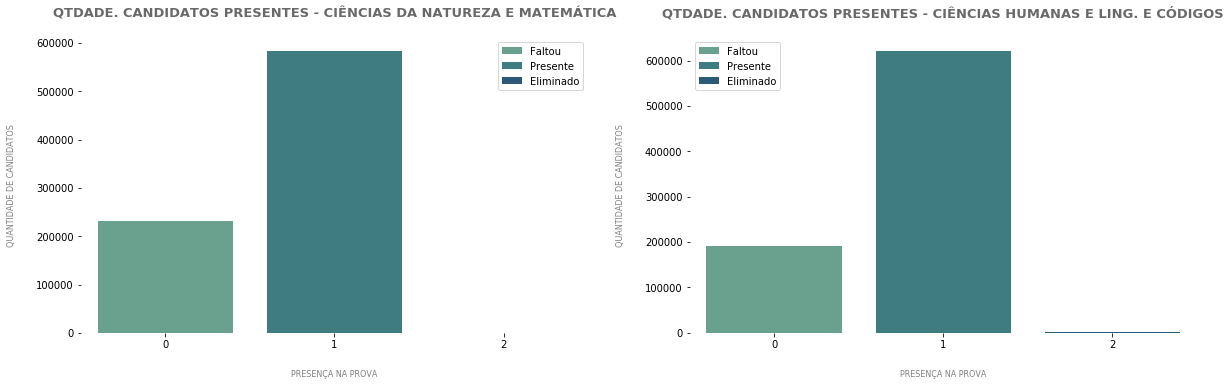

In [76]:
# AS PROVAS CIENCIAS DA NATUREZA E MATEMATICA SAO APLICADAS NO MESMO DIA
# AS PROVAS CIENCIAS HUMANAS E LINGUAGENS E CODIGOS FORAM APLICADAS NO MESMO DIA


# 1 - Linguagens e codigos, ciencias humanas e redacao
# 2 - C. Natureza e matematica


plt.figure(figsize=(20, 25))
#plt.subplots_adjust(hspace = 0.40)

ax1 = plt.subplot(4, 2, 1)
ax1 = sns.countplot(x = 'TP_PRESENCA_CN',data = df,
                    palette = 'crest', hue = 'TP_PRESENCA_CN',
                   dodge = False)

ax1 = plt.title('QTDADE. CANDIDATOS PRESENTES - CIÊNCIAS DA NATUREZA E MATEMÁTICA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax1 = sns.despine(bottom = True, left=True)
ax1 = plt.xlabel('PRESENÇA NA PROVA', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.legend(labels=['Faltou', 'Presente', 'Eliminado'])


###################

ax2 = plt.subplot(4, 2, 2)
ax2 = sns.countplot(x = 'TP_PRESENCA_CH',data = df,
                    palette = 'crest', hue = 'TP_PRESENCA_CH',
                   dodge = False)

ax2 = plt.title('QTDADE. CANDIDATOS PRESENTES - CIÊNCIAS HUMANAS E LING. E CÓDIGOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax2 = sns.despine(bottom = True, left=True)
ax2 = plt.xlabel('PRESENÇA NA PROVA', color = 'grey', labelpad = 20, fontsize = 8)
ax2 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
ax2 = plt.legend(labels=['Faltou', 'Presente', 'Eliminado'])
ax2 = plt.legend(loc=2, labels=['Faltou', 'Presente', 'Eliminado'])



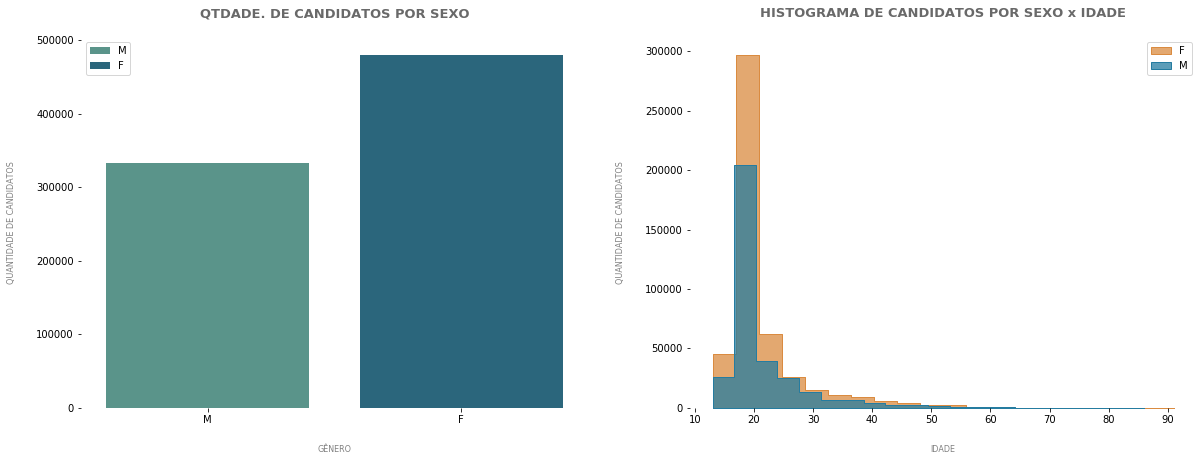

In [85]:
plt.figure(figsize=(20, 15))
s1 = plt.subplot(2, 2, 1)

s1 = sns.countplot(x = 'TP_SEXO', data = df,
                    palette = 'crest', hue = 'TP_SEXO', dodge = False
                   )
s1 = plt.title('QTDADE. DE CANDIDATOS POR SEXO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s1 = sns.despine(bottom = True, left=True)
s1 = plt.xlabel('GÊNERO', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.legend(loc=2, labels=['M', 'F'])


##############

s2 = plt.subplot(2, 2, 2)

sns.histplot(df[df['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(df[df['TP_SEXO'] == 'M']['NU_IDADE'], bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS POR SEXO x IDADE',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


In [ ]:
presenca_por_sexo = df['TP_SEXO'].value_counts()
presenca_por_sexo

Series([], Name: NU_IDADE, dtype: int64)

In [ ]:
# Criando a variavel com os alunos presentes
alunos_presentes = df.query('TP_PRESENCA_CN == 1')

# Criando a coluna com a média das notas
df['NU_MEDIA_TOTAL'] = ((alunos_presentes[['NU_NOTA_CN', 'NU_NOTA_CH',
                                           'NU_NOTA_LC', 'NU_NOTA_MT']].sum(axis = 1)) / 4) # 4 == quantidade de provas aplicadas -- para se tirar a média

# Criando variavel notas
notas_provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_MEDIA_TOTAL']
                                                                                            

In [ ]:
# Visualizando o dataframe somente com as notas das provas dos alunos presentes
alunos_presentes[notas_provas]

### PERFIL DOS CANDIDATOS PRESENTES

In [ ]:
perfil_candidatos = ['NU_IDADE','TP_ANO_CONCLUIU', 'TP_SEXO', 'TP_ESTADO_CIVIL','TP_COR_RACA',
                     'TP_ANO_CONCLUIU', 'IN_TREINEIRO', 'IN_GESTANTE','IN_LACTANTE', 
                     'IN_NOME_SOCIAL','TP_ESCOLA']


#scatter

In [ ]:

        Variáveis referente a presença do aluno nas provas
        - TP_PRESENCA_CN
        - TP_PRESENCA_CH
        - TP_PRESENCA_LC
        - TP_PRESENCA_MT


        Variáveis referente a nota obtida
        - NU_NOTA_CN
        - NU_NOTA_CH
        - NU_NOTA_LC
        - NU_NOTA_MT
        
        Variável referente ao idioma escolhido para prova de língua estrangeira
        - TP_LINGUA
        
        Variável referente a situação da redação
        - TP_STATUS_REDACAO  
        
        Variável nota da redação
        - NU_NOTA_REDACAO
        
        
        (Este agrupamento de variáveis facilitará as posteriores análises)
        (NU_INSCRICAO == ID)